<a href="https://colab.research.google.com/github/yichen917/Kaggle_ML_Projects_M5_Forecasting_Accuracy/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
x_train = pd.read_csv(r'C:\Users\fish19\x_train_start')
y_train = pd.read_csv(r'C:\Users\fish19\y_train')

In [ ]:
x_train.head()

,Unnamed: 0,item_id,dept_id,cat_id,store_id,state_id,date,wm_yr_wk,weekday,month,year,snap,sell_price
0,0,_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-29,11101,Saturday,1,2011,0,9.58
1,1,_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-30,11101,Sunday,1,2011,0,9.58
2,2,_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-31,11101,Monday,1,2011,0,9.58
3,3,_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-02-01,11101,Tuesday,2,2011,1,9.58
4,4,_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-02-02,11101,Wednesday,2,2011,1,9.58


In [ ]:
x_train.shape

(58327370, 13)

In [ ]:
x_train.columns

Index(['Unnamed: 0', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
       'date', 'wm_yr_wk', 'weekday', 'month', 'year', 'snap', 'sell_price'],
      dtype='object')

Remove redundant columns

In [ ]:
x_train = x_train.drop(['Unnamed: 0','item_id','date','wm_yr_wk'], axis = 1)

In [ ]:
x_train.shape

(58327370, 9)

Convert the values of month and year from number to string

In [ ]:
x_train['month'] = x_train['month'].apply(str)
x_train['year'] = x_train['year'].apply(str)

In [ ]:
# one hot encoding
x_train = pd.get_dummies(x_train)

In [ ]:
#standardization
x_train['sell_price'] = (x_train['sell_price'] - np.mean(x_train['sell_price'])) / np.std(x_train['sell_price'])

In [ ]:
x_train.columns

Index(['snap', 'sell_price', 'dept_id_FOODS_1', 'dept_id_FOODS_2',
       'dept_id_FOODS_3', 'dept_id_HOBBIES_1', 'dept_id_HOBBIES_2',
       'dept_id_HOUSEHOLD_1', 'dept_id_HOUSEHOLD_2', 'cat_id_FOODS',
       'cat_id_HOBBIES', 'cat_id_HOUSEHOLD', 'store_id_CA_1', 'store_id_CA_2',
       'store_id_CA_3', 'store_id_CA_4', 'store_id_TX_1', 'store_id_TX_2',
       'store_id_TX_3', 'store_id_WI_1', 'store_id_WI_2', 'store_id_WI_3',
       'state_id_CA', 'state_id_TX', 'state_id_WI', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016'],
      dtype='object')

Condcut the sames pre-processing on the test dataset as the train dataset

In [ ]:
x_test = pd.read_csv(r'C:\Users\fish19\x_test_start')
y_test = pd.read_csv(r'C:\Users\fish19\y_test')

In [ ]:
x_test.head()

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,num_sold,date,wm_yr_wk,weekday,month,year,snap,sell_price
0,0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1914,0,2016-05-23,11617,Monday,5,2016,0,8.38
1,1,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1915,0,2016-05-24,11617,Tuesday,5,2016,0,8.38
2,2,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1916,0,2016-05-25,11617,Wednesday,5,2016,0,8.38
3,3,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1917,2,2016-05-26,11617,Thursday,5,2016,0,8.38
4,4,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1918,0,2016-05-27,11617,Friday,5,2016,0,8.38


In [ ]:
x_test.columns

Index(['Unnamed: 0', 'id', 'item_id', 'dept_id', 'cat_id', 'store_id',
       'state_id', 'd', 'num_sold', 'date', 'wm_yr_wk', 'weekday', 'month',
       'year', 'snap', 'sell_price'],
      dtype='object')

In [ ]:
#drop columns
x_test = x_test.drop(['Unnamed: 0', 'id', 'item_id', 'd', 'num_sold', 'date','wm_yr_wk'], axis = 1)

In [ ]:
#transform year and month to string
x_test['month'] = x_test['month'].apply(str)
x_test['year'] = x_test['year'].apply(str)

In [ ]:
#one hot encoding
x_test = pd.get_dummies(x_test)

In [ ]:
#standardization
x_test['sell_price'] = (x_test['sell_price'] - np.mean(x_test['sell_price'])) / np.std(x_test['sell_price'])

In [ ]:
x_test.shape

(853720, 35)

In [ ]:
x_test.columns

Index(['snap', 'sell_price', 'dept_id_FOODS_1', 'dept_id_FOODS_2',
       'dept_id_FOODS_3', 'dept_id_HOBBIES_1', 'dept_id_HOBBIES_2',
       'dept_id_HOUSEHOLD_1', 'dept_id_HOUSEHOLD_2', 'cat_id_FOODS',
       'cat_id_HOBBIES', 'cat_id_HOUSEHOLD', 'store_id_CA_1', 'store_id_CA_2',
       'store_id_CA_3', 'store_id_CA_4', 'store_id_TX_1', 'store_id_TX_2',
       'store_id_TX_3', 'store_id_WI_1', 'store_id_WI_2', 'store_id_WI_3',
       'state_id_CA', 'state_id_TX', 'state_id_WI', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'month_5',
       'month_6', 'year_2016'],
      dtype='object')

Due to the fewer columns in the test dataset compared to the train dataset, we need to fill in the missing columns accordingly.

In [ ]:
#store column of month 5 and month 6
x_test_rest = x_test[['month_5', 'month_6']]

In [ ]:
#store column of 2016
x_test_last = x_test[['year_2016']]

In [ ]:
#drop columns
x_test = x_test.drop(['month_5','month_6', 'year_2016'], axis = 1)

In [ ]:
# add columns
x_test['month_1'] = 0
x_test['month_2'] = 0
x_test['month_3'] = 0
x_test['month_4'] = 0

In [ ]:
x_test = pd.concat([x_test,x_test_rest], axis = 1)

In [ ]:
x_test['month_7'] = 0
x_test['month_8'] = 0
x_test['month_9'] = 0
x_test['month_10'] = 0
x_test['month_11'] = 0
x_test['month_12'] = 0
x_test['year_2011'] = 0
x_test['year_2012'] = 0
x_test['year_2013'] = 0
x_test['year_2014'] = 0
x_test['year_2015'] = 0
x_test = pd.concat([x_test,x_test_last], axis = 1)

In [ ]:
x_test.head()

,snap,sell_price,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,cat_id_FOODS,...,month_9,month_10,month_11,month_12,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,0,1.103713,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1.103713,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1.103713,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.103713,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1.103713,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_train.head()

,snap,sell_price,dept_id_FOODS_1,dept_id_FOODS_2,dept_id_FOODS_3,dept_id_HOBBIES_1,dept_id_HOBBIES_2,dept_id_HOUSEHOLD_1,dept_id_HOUSEHOLD_2,cat_id_FOODS,...,month_6,month_7,month_8,month_9,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,0,1.456259,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1.456259,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1.456259,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1.456259,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1.456259,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Address redundant labeling columns of y

In [ ]:
y_train = y_train.drop('Unnamed: 0', axis = 1 )

In [ ]:
y_test = y_test.drop('Unnamed: 0', axis = 1 )

In [ ]:
x_train.shape

(58327370, 50)

In [ ]:
y_train.shape

(58327370, 1)

In [ ]:
x_test.shape

(853720, 50)

In [ ]:
y_test.shape

(853720, 1)

xgboost model

In [ ]:
!pip install xgboost

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

Take the first product for testing and validation. Train on the first 1721 days of the total 1913 days and use the remaining 192 days for validation.

In [ ]:
#validation
train_days = 1721
x = x_train.iloc[:train_days].values
y = y_train.iloc[:train_days].values
test_days = 192
xtest = x_train.iloc[train_days:train_days + test_days].values
ytest = y_train.iloc[train_days:train_days + test_days].values
reg = xgb.XGBRegressor(n_estimators=10000)
reg.fit(x,y)
predictions_1 = reg.predict(xtest)

In [ ]:
predictions_1.reshape((192,1))

array([[ 4.04847145e-01],
       [ 7.81655312e-03],
       [ 9.83543634e-01],
       [ 9.93816018e-01],
       [ 2.22872198e-02],
       [ 5.03113866e-03],
       [-5.14209270e-04],
       [ 4.04847145e-01],
       [ 7.81655312e-03],
       [ 9.83543634e-01],
       [ 9.93816018e-01],
       [ 2.22872198e-02],
       [ 5.03113866e-03],
       [-5.14209270e-04],
       [ 4.04847145e-01],
       [ 7.81655312e-03],
       [ 1.26226163e+00],
       [ 5.13263524e-01],
       [ 6.04845881e-01],
       [ 3.14810216e-01],
       [ 5.23113012e-01],
       [ 4.68011558e-01],
       [ 1.53193069e+00],
       [ 1.26226163e+00],
       [ 5.13263524e-01],
       [ 6.04845881e-01],
       [ 5.12667477e-01],
       [ 5.28460085e-01],
       [ 9.07972574e-01],
       [ 9.79144037e-01],
       [ 7.42478490e-01],
       [ 1.20833158e+00],
       [ 3.52355331e-01],
       [ 5.12667477e-01],
       [ 5.28460085e-01],
       [ 9.07972574e-01],
       [ 9.79144037e-01],
       [ 7.42478490e-01],
       [ 1.2

In [ ]:
def RMSE(y_real, y_hat):
    RMSE = 0
    for i in range (len(y_real)):
        RMSE += (y_real[i] - y_hat[i])**2
    RMSE = (RMSE / len(y_real)) ** 0.5
    return RMSE

In [ ]:
RMSE(predictions_1, ytest)

array([1.1348348])

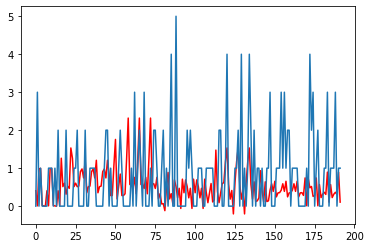

In [ ]:
plt.plot(predictions_1, color = 'red')
plt.plot(ytest)

In [ ]:
#evaluation
train = 1913
x_t = x_train.iloc[:train].values
y_t = y_train.iloc[:train].values
test = 28
x_eval = x_test.iloc[train:train + test].values
y_eval = y_test.iloc[train:train + test].values
reg.fit(x_t,y_t)
predictions_2 = reg.predict(x_eval)

In [ ]:
predictions_2.reshape((28,1))

array([[ 4.9986911e-01],
       [ 9.9984199e-01],
       [ 1.0045100e+00],
       [-1.1335015e-03],
       [ 9.9573773e-01],
       [ 1.8934846e-02],
       [ 9.9861801e-01],
       [ 4.9986911e-01],
       [ 9.9984199e-01],
       [ 1.0045100e+00],
       [ 6.6764188e-01],
       [ 1.3335721e+00],
       [ 6.6505086e-01],
       [ 9.9975812e-01],
       [ 1.0012171e+00],
       [ 3.3698702e-01],
       [ 2.3288980e+00],
       [ 6.6764188e-01],
       [ 1.3335721e+00],
       [ 1.3326385e+00],
       [-5.3155422e-04],
       [ 5.0163823e-01],
       [ 3.3771554e-01],
       [ 1.0017914e+00],
       [ 3.3297536e+00],
       [ 6.6378713e-01],
       [ 1.3326385e+00],
       [-5.3155422e-04]], dtype=float32)

In [ ]:
RMSE(predictions_2, y_eval)

array([1.16121088])

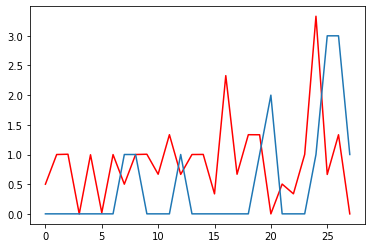

In [ ]:
plt.plot(predictions_2, color = 'red')
plt.plot(y_eval)